# Python Coursework Project 2021/2022

### Course name and code: Programming for Data Science ST2195
### Student UOL number: 180296505

The data set used is retrieved from the Harvard Dataverse website with the following webpage: <b>Data Expo 2009: Airline on time data </b>

The flight data comprises of 14,282,518 flights within the USA from years 2005 to 2006.

### This data set contains the following variables:
1. <b>Year</b>: 2015-2016
2. <b>Month</b>: 1-12
3. <b>DayofMonth</b>: 1-31
4. <b>DayOfWeek</b>: 1 (Monday) - 7 (Sunday)
5. <b>DepTime</b>: Actual Departure Time (local, hhmm)
6. <b>CRSDepTime</b>: Scheduled Departure Time (local, hhmm)
7. <b>ArrTime</b>: Actual Arrival Time (local, hhmm)
8. <b>CRSArrTime</b>: Scheduled Arrival Time (local, hhmm)
9. <b>UniqueCarrier</b>: Unique Carrier Code
10. <b>FlightNum</b>: Flight Number
11. <b>TailNum</b>: Tail Number
12. <b>ActualElapsedTime</b>: in minutes
13. <b>CRSElapsedTime</b>: in minutes
14. <b>AirTime</b>: in minutes
15. <b>ArrDelay</b>: Arrival Delay, in minutes
16. <b>DepDelay</b>: Departure Delay, in minutes
17. <b>Origin</b>: Origin IATA airport code
18. <b>Dest</b>: Destination IATA airport code
19. <b>Distance</b>: in miles
20. <b>TaxiIn</b>: Taxi In Time, in minutes
21. <b>TaxiOut</b>: Taxi Out Time, in minutes
22. <b>Cancelled</b>: Was the flight cancelled?
23. <b>CancellationCode</b>: Reason for cancellation (A = Carrier, B = Weather, C = NAS, D = Security)
24. <b>Diverted</b>: 1 = yes, 0 = no
25. <b>CarrierDelay</b>: in minutes
26. <b>WeatherDelay</b>: in minutes
27. <b>NASDelay</b>: in minutes
28. <b>SecurityDelay</b>: in minutes
29. <b>LateAircraftDelay</b>: in minutes

### 1. Importing modules and checking working directory

In [1]:
import os # File management
import pandas as pd # Data manipulation
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt # Data visualisation
%matplotlib inline
import seaborn as sns
import networkx as nx # Network visualisation
from sklearn.pipeline import Pipeline # Machine learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Change working directory to specified path
os.chdir(r"C:\Users\amand\Documents\SIM stuff\Course related\Year 4\ST2195 Programming for Data Science\Coursework By 1st Apr 2022\Data Expo Harvard\dataverse_files")
print("Working Directory changed")

Working Directory changed


In [3]:
# Check working directory
cwd = os.getcwd()

### 2. Loading data from CSV files to Data frame

In [4]:
# Create Data frames from CSV files
# na_values parameter treats missing values as NA
flights2005 = pd.read_csv('2005.csv', na_values=['NA'])
flights2006 = pd.read_csv('2006.csv', na_values=['NA'])

# Concatenate both Data frames into one
# ignore_index parameter if set to True, will not use the index values on the concatenation axis 
flights = pd.concat([flights2005, flights2006], ignore_index=True)

flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


### 2.1 Raw data information

In [5]:
# Returns the dimensions of Data frame
print(flights2005.shape,flights2006.shape)

# Summarises Data frame
flights.info()

(7140596, 29) (7141922, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14282518 entries, 0 to 14282517
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       i

### 3. Data cleaning

### 3.1 Checking for missing data

In [6]:
# Check the percentage of missing values present
pct_missing_val = (flights.isna().mean().round(4) * 100)
print(pct_missing_val)

Year                  0.00
Month                 0.00
DayofMonth            0.00
DayOfWeek             0.00
DepTime               1.79
CRSDepTime            0.00
ArrTime               2.00
CRSArrTime            0.00
UniqueCarrier         0.00
FlightNum             0.00
TailNum               0.00
ActualElapsedTime     2.00
CRSElapsedTime        0.00
AirTime               2.00
ArrDelay              2.00
DepDelay              1.79
Origin                0.00
Dest                  0.00
Distance              0.00
TaxiIn                0.00
TaxiOut               0.00
Cancelled             0.00
CancellationCode     98.21
Diverted              0.00
CarrierDelay          0.00
WeatherDelay          0.00
NASDelay              0.00
SecurityDelay         0.00
LateAircraftDelay     0.00
dtype: float64


### 3.2 Dealing with unnecessary data

In [7]:
# Drop irrelevant columns
# Removed cancelled and diverted flights as the focus is on flight delays
variables_dropped = ['FlightNum', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted']
flights.drop(variables_dropped, axis=1, inplace=True)

### 3.3 Handling incorrect data types and missing data

In [8]:
# Coerce Year column into int16 format
flights['Year'] = flights['Year'].astype(np.int16)

# Coerce date specific columns from int to str type
flights['Month'] = flights['Month'].astype(str)
flights['DayofMonth'] = flights['DayofMonth'].astype(str)
flights['DayOfWeek'] = flights['DayOfWeek'].astype(str)

In [9]:
# Filling missing values with mean values and coerce to int type
DepTime_mean = flights['DepTime'].mean()
flights['DepTime'] = flights['DepTime'].fillna(DepTime_mean).astype(np.int16)
ArrTime_mean = flights['ArrTime'].mean()
flights['ArrTime'] = flights['ArrTime'].fillna(ArrTime_mean).astype(np.int16)
AirTime_mean = flights['AirTime'].mean()
flights['AirTime'] = flights['AirTime'].fillna(AirTime_mean).astype(np.int16)

# Filling missing values with 0s and coerce to int type
flights['CRSDepTime'] = flights['CRSDepTime'].fillna(0).astype(np.int16)
flights['CRSArrTime'] = flights['CRSArrTime'].fillna(0).astype(np.int16)
flights['ActualElapsedTime'] = flights['ActualElapsedTime'].fillna(0).astype(np.int16)
flights['CRSElapsedTime'] = flights['CRSElapsedTime'].fillna(0).astype(np.int16)
flights['Distance'] = flights['Distance'].fillna(0).astype(np.int16)
flights['CarrierDelay'] = flights['CarrierDelay'].fillna(0).astype(np.int16)
flights['WeatherDelay'] = flights['WeatherDelay'].fillna(0).astype(np.int16)
flights['NASDelay'] = flights['NASDelay'].fillna(0).astype(np.int16)
flights['SecurityDelay'] = flights['SecurityDelay'].fillna(0).astype(np.int16)
flights['LateAircraftDelay'] = flights['LateAircraftDelay'].fillna(0).astype(np.int16)

# Replace missing values for 'ArrDelay' column with 'ArrTime' subtracted by the 'CRSArrTime' and coerce to int type
flights['ArrDelay'] = flights['ArrDelay'].fillna(flights.ArrTime - flights.CRSArrTime).astype(np.int16)

# Replace missing values for 'DepDelay' column by adding all the delay values together and coerce to int type
DelaySum = flights[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum(axis=1)
flights['DepDelay'] = flights['DepDelay'].fillna(DelaySum).astype(np.int16)

In [10]:
# Convert time variables to hh.mm format and round to nearest whole number
flights['DepTime'] = flights['DepTime'].div(100).round(0)
flights['ArrTime'] = flights['ArrTime'].div(100).round(0)
flights['CRSDepTime'] = flights['CRSDepTime'].div(100).round(0)
flights['CRSArrTime'] = flights['CRSArrTime'].div(100).round(0)

A flight is considered late if it is delayed by 15 minutes or more as mentioned by the Bureau of Transportation Statistics.

In [11]:
# Create FlightStatus column with status On-Time and Delayed for arrivals
flights.loc[flights.DepDelay < 15, 'DepStatus'] = 'On-Time'
flights.loc[flights.DepDelay >= 15, 'DepStatus'] = 'Delayed'
flights.loc[flights.ArrDelay < 15, 'ArrStatus'] = 'On-Time'
flights.loc[flights.ArrDelay >= 15, 'ArrStatus'] = 'Delayed'

# Coerce relevant columns to category data type as these columns only have a fixed set of possible values
for col in ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'DepStatus', 'ArrStatus']:
    flights[col] = flights[col].astype('category')

In [12]:
# Drop any rows containing NAs
flights.dropna(inplace=True)

In [13]:
print(flights)
print(flights.dtypes)

          Year Month DayofMonth DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0         2005     1         28         5     16.0        16.0     17.0   
1         2005     1         29         6     16.0        16.0     17.0   
2         2005     1         30         7     16.0        16.0     17.0   
3         2005     1         31         1     16.0        16.0     17.0   
4         2005     1          2         7     19.0        19.0     22.0   
...        ...   ...        ...       ...      ...         ...      ...   
14282513  2006    12         29         5     12.0        12.0     15.0   
14282514  2006    12         29         5     12.0        12.0     20.0   
14282515  2006    12         29         5     21.0        21.0     23.0   
14282516  2006    12         29         5     21.0        21.0     22.0   
14282517  2006    12         29         5     20.0        20.0     22.0   

          CRSArrTime UniqueCarrier TailNum  ...  Origin  Dest  Distance  \
0               18.0    

### 3.4 Handling duplicates

In [14]:
# Locate duplicate rows
flights.loc[flights.duplicated(), :]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,...,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepStatus,ArrStatus
233911,2005,1,23,7,20.0,20.0,21.0,21.0,OO,N412SW,...,DEN,SBA,916,0,0,0,0,0,On-Time,On-Time
516951,2005,1,1,6,0.0,23.0,3.0,2.0,B6,N581JB,...,JFK,FLL,1069,55,0,0,0,0,Delayed,Delayed
2883647,2005,5,1,7,7.0,7.0,9.0,10.0,B6,N559JB,...,TPA,BOS,1185,0,0,0,0,0,On-Time,On-Time
2883656,2005,5,1,7,8.0,8.0,10.0,10.0,B6,N533JB,...,TPA,JFK,1005,0,0,0,0,0,On-Time,On-Time
2929363,2005,5,31,2,0.0,24.0,8.0,7.0,DH,N803BR,...,LAX,IAD,2288,6,0,15,0,0,On-Time,Delayed
3838836,2005,7,31,7,6.0,6.0,7.0,7.0,OO,N975SW,...,MFR,SFO,329,0,0,0,0,0,On-Time,On-Time
4422382,2005,8,1,1,21.0,20.0,22.0,21.0,OO,N297SW,...,SBA,LAX,89,0,0,38,0,0,Delayed,Delayed
4581766,2005,8,12,5,19.0,16.0,20.0,17.0,FL,N933AT,...,SAV,ATL,215,0,0,0,0,211,Delayed,Delayed
4592034,2005,8,31,3,15.0,14.0,17.0,16.0,FL,N935AT,...,CAK,ATL,528,0,0,0,0,37,Delayed,Delayed
5171691,2005,9,6,2,14.0,14.0,18.0,17.0,FL,N978AT,...,IND,MCO,828,0,0,5,0,30,Delayed,Delayed


In a glance, the duplicates found have identical elements across specific columns such as UniqueCarrier and Dest but not all elements in the rows. Hence, these duplicates will not be dropped to prevent data loss which may be crucial for analysis.

### 3.5 Validating Data Frame after data cleaning

In [15]:
# Summary of Data frame
flights.info()
flights.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14282518 entries, 0 to 14282517
Data columns (total 25 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Year               int16   
 1   Month              category
 2   DayofMonth         category
 3   DayOfWeek          category
 4   DepTime            float64 
 5   CRSDepTime         float64 
 6   ArrTime            float64 
 7   CRSArrTime         float64 
 8   UniqueCarrier      category
 9   TailNum            category
 10  ActualElapsedTime  int16   
 11  CRSElapsedTime     int16   
 12  AirTime            int16   
 13  ArrDelay           int16   
 14  DepDelay           int16   
 15  Origin             category
 16  Dest               category
 17  Distance           int16   
 18  CarrierDelay       int16   
 19  WeatherDelay       int16   
 20  NASDelay           int16   
 21  SecurityDelay      int16   
 22  LateAircraftDelay  int16   
 23  DepStatus          category
 24  ArrStatus          cat

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,...,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepStatus,ArrStatus
0,2005,1,28,5,16.0,16.0,17.0,18.0,UA,N935UA,...,BOS,ORD,867,0,0,0,0,0,On-Time,On-Time
1,2005,1,29,6,16.0,16.0,17.0,18.0,UA,N941UA,...,BOS,ORD,867,0,0,0,0,0,On-Time,On-Time
2,2005,1,30,7,16.0,16.0,17.0,18.0,UA,N342UA,...,BOS,ORD,867,0,0,0,0,0,On-Time,On-Time
3,2005,1,31,1,16.0,16.0,17.0,18.0,UA,N326UA,...,BOS,ORD,867,0,0,0,0,0,On-Time,On-Time
4,2005,1,2,7,19.0,19.0,22.0,22.0,UA,N902UA,...,ORD,BOS,867,0,0,0,0,0,Delayed,On-Time


In [16]:
# Display descriptive statistics of data frame 
flights.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,14282518.0,2005.500046,0.500000,2005.0,2005.0,2006.0,2006.0,2006.0
DepTime,14282518.0,13.295706,4.721023,0.0,9.0,13.0,17.0,29.0
CRSDepTime,14282518.0,13.204925,4.648245,0.0,9.0,13.0,17.0,24.0
ArrTime,14282518.0,14.760867,4.962206,0.0,11.0,15.0,19.0,30.0
CRSArrTime,14282518.0,14.844896,4.805495,0.0,11.0,15.0,19.0,24.0
ActualElapsedTime,14282518.0,122.885662,72.509627,-66.0,72.0,105.0,154.0,1879.0
CRSElapsedTime,14282518.0,126.544696,70.036457,-97.0,75.0,108.0,156.0,1031.0
AirTime,14282518.0,102.064386,78.714567,-1428.0,54.0,85.0,130.0,1958.0
ArrDelay,14282518.0,6.892724,75.519940,-939.0,-9.0,-1.0,12.0,1925.0
DepDelay,14282518.0,9.216652,32.110572,-1200.0,-4.0,0.0,8.0,1930.0


The maximum departure time is at 29 hours where the flight only departs a day later at 5am. In addition, the maximum arrival time is at 30 hours where the flight only arrives a day later at 6am. The maximum arrival delay is 1,925 minutes and the maximum departure delay is 1,930 minutes which are more than 24 hours. This can be confusing to compute as we have to account for the day change so we are only keeping the rows where there are no flights later than 24 hours. In addition, early departures and arrivals are replaced with 0 as the earliest flight departed 20 hours earlier which is odd. This is to prevent any data loss and it also narrows the focus to delayed flights.

In [17]:
# Replace negative values with 0
num = flights._get_numeric_data()
num[num < 0] = 0

# Drop DepTime and ArrTime rows that are more than 24hrs
flights.drop(flights[flights.DepTime > 24].index, inplace=True)
flights.drop(flights[flights.ArrTime > 24].index, inplace=True)

# Drop ArrDelay rows that are more than 24hrs
flights.drop(flights[flights.ArrDelay > 1440].index, inplace=True)

# Drop DepDelay rows that are more than 24hrs
flights.drop(flights[flights.DepDelay > 1440].index, inplace=True)

In [18]:
# Validate statistics of data frame
flights.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,14277719.0,2005.500097,0.500000,2005.0,2005.0,2006.0,2006.0,2006.0
DepTime,14277719.0,13.293225,4.719034,0.0,9.0,13.0,17.0,24.0
CRSDepTime,14277719.0,13.202198,4.646499,0.0,9.0,13.0,17.0,24.0
ArrTime,14277719.0,14.758378,4.960412,0.0,11.0,15.0,19.0,24.0
CRSArrTime,14277719.0,14.846247,4.801306,0.0,11.0,15.0,19.0,24.0
ActualElapsedTime,14277719.0,122.903206,72.508032,0.0,72.0,105.0,154.0,1879.0
CRSElapsedTime,14277719.0,126.548959,70.040382,0.0,75.0,108.0,156.0,1031.0
AirTime,14277719.0,103.028430,68.683190,0.0,55.0,85.0,130.0,1958.0
ArrDelay,14277719.0,16.313081,53.031918,0.0,0.0,0.0,12.0,1440.0
DepDelay,14277719.0,11.288844,30.857182,0.0,0.0,0.0,8.0,1422.0


In [19]:
flights.shape

(14277719, 25)

After data wrangling, a total of 14,277,719 flights within the USA and 25 variables are kept for further data analysis and building the flight prediction model.

In [20]:
# Save cleaned data frame into flights CSV file
flights.to_csv('flights.csv', index=False)

### 4. Exploratory Data Analysis

### 4.1 Finding correlations between variables

How to read correlations from heatmap:

+1.0 = Positive perfect correlation between variables

0 = No correlation between variables

-1.0 = Negative perfect correlation between variables

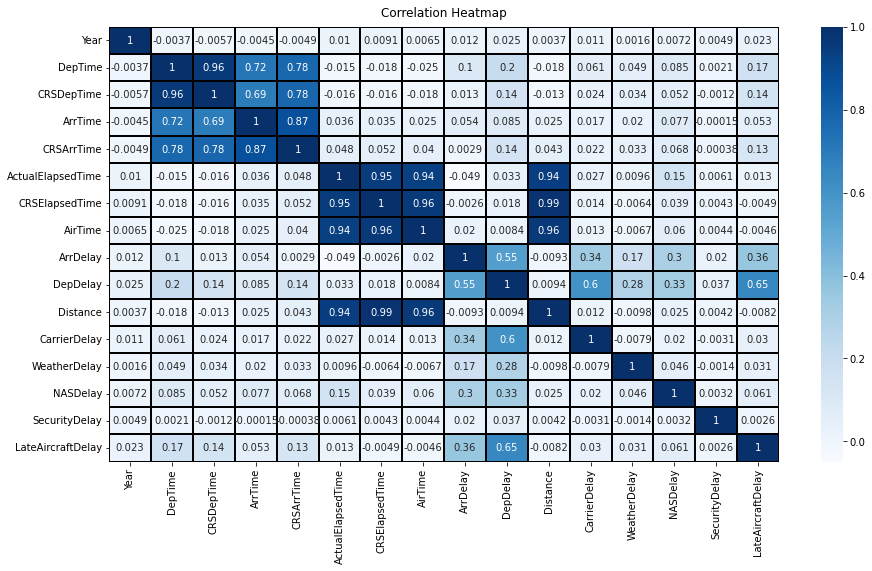

In [21]:
# Create heatmap to display the correlations between variables
# Increases size of the heatmap displayed
plt.figure(figsize=(15,8))

# Set annotation to True to display the correlation values on the heatmap
# cmap parameter maps the data values with the color space based on color palette chosen
heatmap = sns.heatmap(flights.corr(), cmap="Blues", linewidths=0.1, linecolor='black', annot=True)

# Give heatmap a title
# pad parameter defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10)

plt.show()

The heatmap shows some strong positive correlations between variables such as DepTime and ArrTime with a correlation of 0.72. This also reflects the positive correlation shown in DepDelay and ArrDelay with a correlation of 0.55. It is further shown with DepDelay and LateAircraftDelay with a correlation of 0.65. This can be inferred as almost all flights departing late will result in flights arriving late at their destinations.

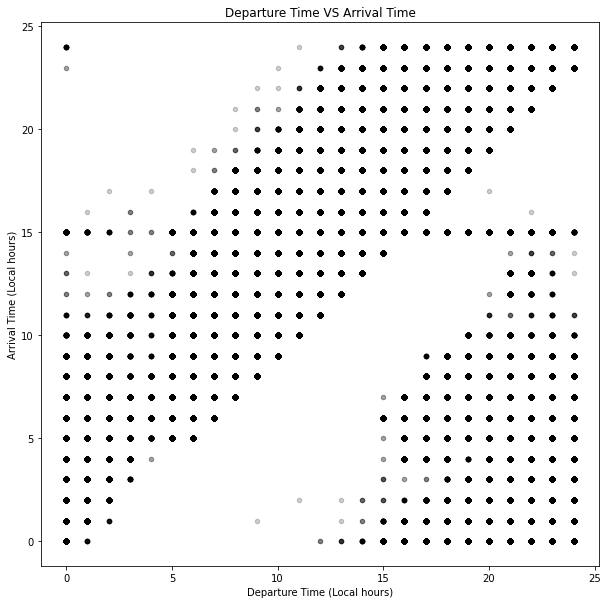

In [22]:
# Create scatterplot depicting the bivariate correlation between DepTime and ArrTime
plt.figure(figsize=(10,10))

# s parameter adjusts the line marker size
# alpha parameter adjusts the blending value, making the scatterplot more opaque
plt.scatter(flights['DepTime'], flights['ArrTime'], s=20, color='black', alpha=0.2)
plt.title('Departure Time VS Arrival Time')
plt.xlabel('Departure Time (Local hours)')
plt.ylabel('Arrival Time (Local hours)')

# Saves scatterplot as a PNG file
plt.savefig('DepTime VS ArrTime.png', transparent=True)

The scatterplot shows a correlation of 0.72 between DepTime and ArrTime. A positive correlation is confirmed between Departure Time and Arrival Time as seen by the upward straight line. This shows that there are fixed schedules between departures and arrivals. On the other hand, there are groups of flights which depart from 3pm to midnight and arrive in the mornings.

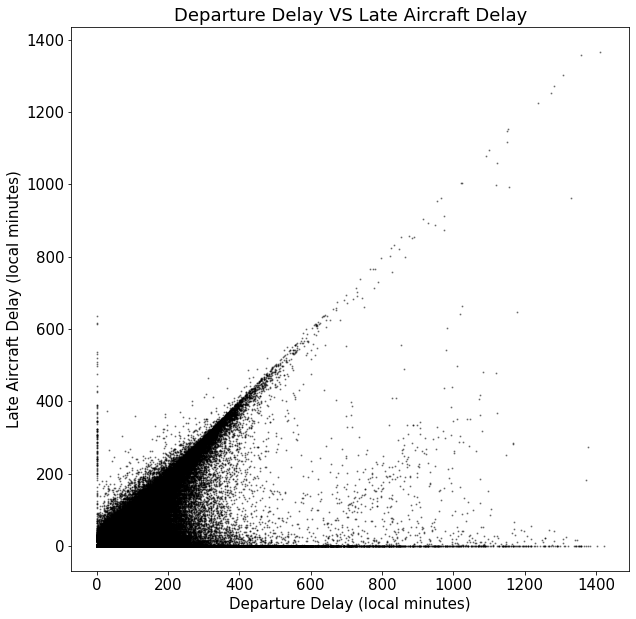

In [23]:
# Create scatterplot depicting the bivariate correlation between DepDelay and LateAircraftDelay
plt.figure(figsize=(10,10))
plt.scatter(flights['DepDelay'], flights['LateAircraftDelay'], s=1, color='black', alpha=0.4)
plt.title('Departure Delay VS Late Aircraft Delay', fontsize=18)
plt.xlabel('Departure Delay (local minutes)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Late Aircraft Delay (local minutes)', fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('DepDelay VS LateAircraftDelay.png', transparent=True)

The scatterplot shows a correlation of 0.65 between DepDelay and LateAircraftDelay. The first thing to note is the arc shape where there is a straight line displaying a clear relation between flights departing late which resulted in aircrafts arriving late at their destinations. On the other hand, not all flights departing late will cause the next aircraft to be late as well as most of the flights lie below the straight line of the scatterplot and this may be due to other factors like airport operations or flight adjustments that allow flights to depart late and arrive at their destinations on-time.

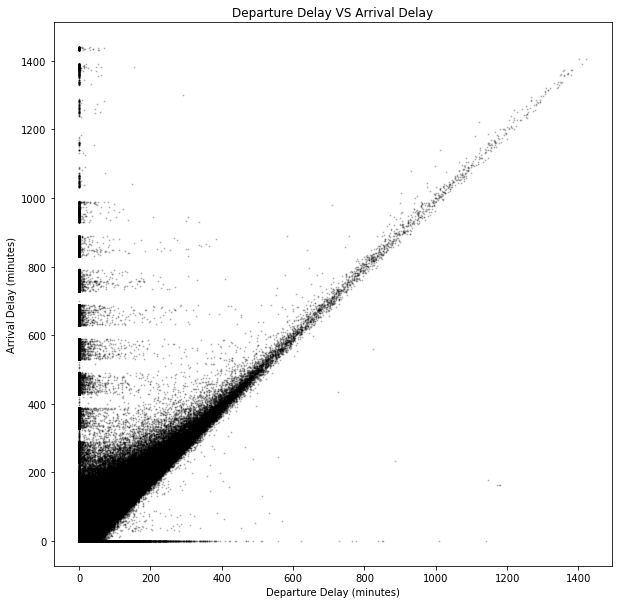

In [24]:
# Create scatterplot depicting the bivariate correlation between DepDelay and ArrDelay
plt.figure(figsize=(10,10))
plt.scatter(flights['DepDelay'], flights['ArrDelay'], s=1, color='black', alpha=0.2)
plt.title('Departure Delay VS Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')

plt.savefig('DepDelay VS ArrDelay.png', transparent=True)

The scatterplot shows a correlation of 0.55 between DepDelay and ArrDelay. This correlation is clearly depicted in the scatterplot with upward straight line. Flights departing late almost entirely will result in flights arriving late with the exception of a group of flights departing on-time and arriving late as displayed by the vertical line at the departure delay 0-axis. This may be due to a number of factors such as turbulence.

### 4.2 Distribution of flights

### By month

In [25]:
# Number of flights by month
flights['Month'] = pd.Categorical(flights['Month'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
flights['Month'] = flights['Month'].cat.rename_categories({'1': 'January', '2': 'February', '3': 'March', '4': 'April', '5': 'May', '6': 'June', '7': 'July', '8': 'August', '9': 'September', '10': 'October', '11': 'November', '12': 'December'})
flights_count_month = flights.groupby('Month')['Month'].count()
print(flights_count_month)

Month
January      1175647
February     1076123
March        1222311
April        1179523
May          1217490
June         1206995
July         1248503
August       1258937
September    1158967
October      1204219
November     1152143
December     1176861
Name: Month, dtype: int64


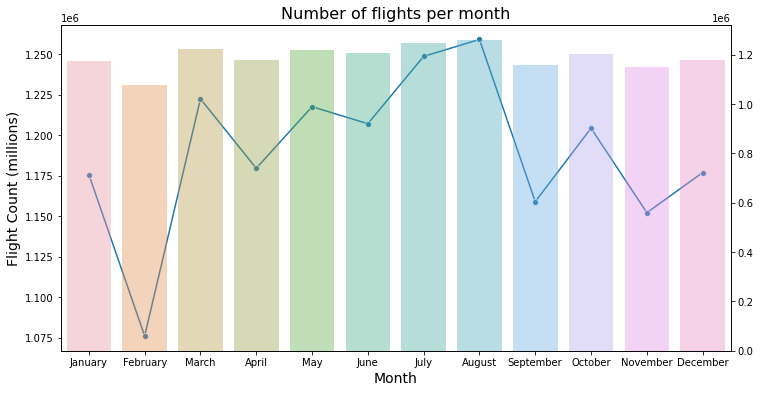

In [26]:
# Create barchart to display the number of flights by month
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(x=flights_count_month.index, y=flights_count_month.values, marker='o', sort=False, ax=ax1)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Flight Count (millions)', fontsize=14)
ax2 = ax1.twinx()

sns.barplot(x=flights_count_month.index, y=flights_count_month.values, alpha=0.4, ax=ax2)
ax2.set_title('Number of flights per month', fontsize=16)

plt.show()

The lowest flight count is in February at 1,076,123 with the highest flight count in August at 1,258,937.

### By flight status (delayed and on-time)

In [27]:
# Count the number of times that flights were delayed and on-time for departures and arrivals
DepStatus = flights.groupby('DepStatus')['DepStatus'].count()
ArrStatus = flights.groupby('ArrStatus')['ArrStatus'].count()
print(DepStatus)
print()
print(ArrStatus)

DepStatus
Delayed     2700878
On-Time    11576841
Name: DepStatus, dtype: int64

ArrStatus
Delayed     3201572
On-Time    11076147
Name: ArrStatus, dtype: int64


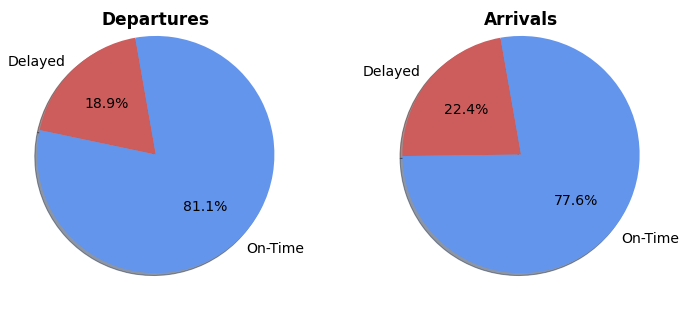

In [28]:
# Create piecharts showing the percentage of delayed VS on-time flights for departures and arrivals
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(2,2,1)
ax.pie(DepStatus, labels=DepStatus.index, colors=['IndianRed','CornflowerBlue'], textprops={'fontsize': 14}, shadow=True, startangle=100, autopct='%1.1f%%')
ax.set_title('Departures', fontsize=17, fontweight='bold', y=0.92)

ax2 = fig.add_subplot(2,2,2)
ax2.pie(ArrStatus, labels=ArrStatus.index, colors=['IndianRed','CornflowerBlue'], textprops={'fontsize': 14}, shadow=True, startangle=100, autopct='%1.1f%%')
ax2.set_title('Arrivals', fontsize=17, fontweight='bold', y=0.92)

plt.show()

We can see that 81.1% of flights departed on-time and 18.9% departed late whereas 77.6% of flights arrived on-time and 22.4% arrived late.

3.5% of flights departed on-time but arrived late.

### 5. Questions to answer

### Q1: When is the best time of day, day of the week, and time of year to fly to minimise delays?

The key word being "minimise delays" narrows down to on-time flights. Departure Delay is used as the delay variable to answer the question, focusing on take-offs since it specifies the best time to fly.

### Best time to fly to minimise delays

In [29]:
# Create function to retrieve statistical parameters from a groupby object:
def get_stats(group):
    """
    The purpose of this function is to
    extract statistical parameters from a grouby object.
    """
    return {'mean': group.mean(), 'count': group.count()}

# Calculate the mean and average number of departures by day of the month
flights['DayofMonth'] = pd.Categorical(flights['DayofMonth'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'])
day = flights.groupby('DayofMonth')['DepDelay'].apply(get_stats).unstack()
day

,mean,count
DayofMonth,,
1,10.535629,468274.0
2,11.742562,469500.0
3,10.610392,463630.0
4,9.339696,461133.0
5,10.572576,468027.0
6,9.715344,474387.0
7,10.191193,471472.0
8,9.989511,469538.0
9,9.826341,469298.0


In [30]:
# Create data frames for mean values of departure delays based on day of the month
mean_day = day['mean'].values
mean_day = np.round(mean_day,0)

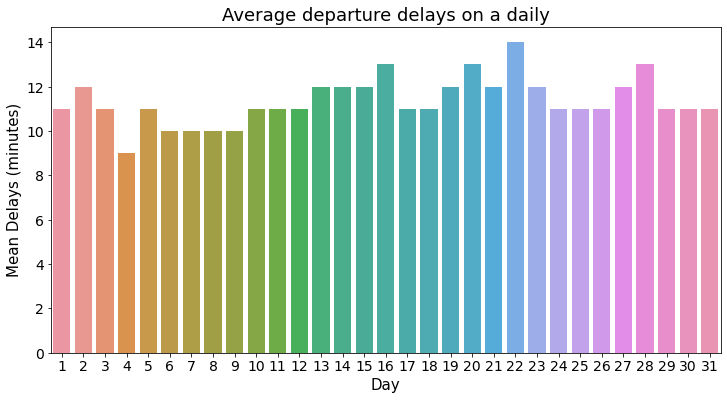

In [31]:
# Create barchart to portray the average departure delays on a daily basis
plt.figure(figsize=(12,6))
sns.barplot(x=day.index, y=mean_day)
plt.title('Average departure delays on a daily', fontsize=18)
plt.xlabel('Day', fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Mean Delays (minutes)', fontsize=15)
plt.yticks(fontsize=14)

plt.show()

The best time of day to minimise departure delays is to fly on the 4th of each month with the lowest average departure delay of 9 minutes.

In [32]:
# Coerce DepTime column to category
flights['DepTime'].astype('category')

# Calculate the mean and average number of flight departure delays by time of day
departure_time = flights.groupby('DepTime')['DepDelay'].apply(get_stats).unstack()
departure_time

,mean,count
DepTime,,
0.0,58.412848,38542.0
1.0,67.399044,18617.0
2.0,96.069106,4920.0
3.0,130.994440,1259.0
4.0,50.890547,1005.0
5.0,1.067023,85926.0
6.0,1.371558,840773.0
7.0,2.824881,894266.0
8.0,4.177517,962956.0


In [33]:
# Create data frame for mean values based on by time of day
mean_departure_time = departure_time['mean'].values
mean_departure_time = np.round(mean_departure_time,0)

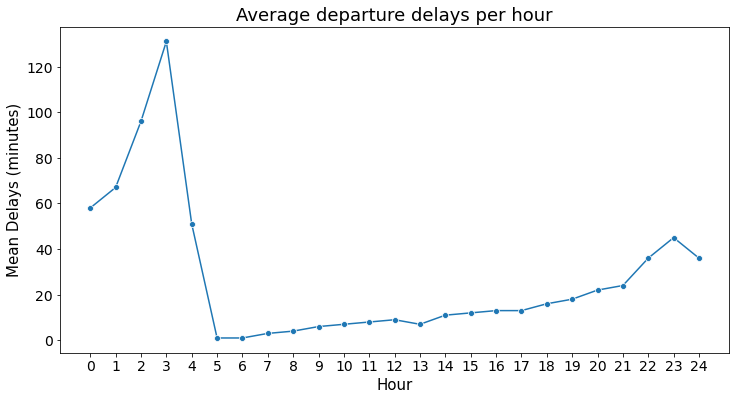

In [34]:
# Create line plot based on average flight delays per hour
plt.figure(figsize=(12,6))

sns.lineplot(x=departure_time.index, y=mean_departure_time, marker='o', sort=False)
plt.title('Average departure delays per hour', fontsize=18)
plt.xlabel('Hour', fontsize=15)
plt.xticks(departure_time.index, fontsize=14)
plt.ylabel('Mean Delays (minutes)', fontsize=15)
plt.yticks(fontsize=14)

plt.show()

The timing of each day to minimise departure delays is to fly between 5am to 7am with the lowest average departure delay of 1 to 3 minutes.

### Best day of the week to fly to minimise delays

In [35]:
# Calculate the mean and average number of departure delays by weekday
flights['DayOfWeek'] = pd.Categorical(flights['DayOfWeek'], ['1', '2', '3', '4', '5', '6', '7'])
flights['DayOfWeek'] = flights['DayOfWeek'].cat.rename_categories({'1': 'Monday', '2': 'Tuesday', '3': 'Wednesday', '4': 'Thursday', '5': 'Friday', '6': 'Saturday', '7': 'Sunday'})

day_week = flights.groupby('DayOfWeek')['DepDelay'].apply(get_stats).unstack()
day_week

,mean,count
DayOfWeek,,
Monday,11.583325,2096220.0
Tuesday,9.478411,2067016.0
Wednesday,10.696847,2085417.0
Thursday,12.695087,2099878.0
Friday,13.429152,2106854.0
Saturday,9.526336,1818644.0
Sunday,11.340038,2003690.0


In [36]:
# Create data frame for mean values based on weekday
mean_day_week = day_week['mean'].values
mean_day_week = np.round(mean_day_week,0)

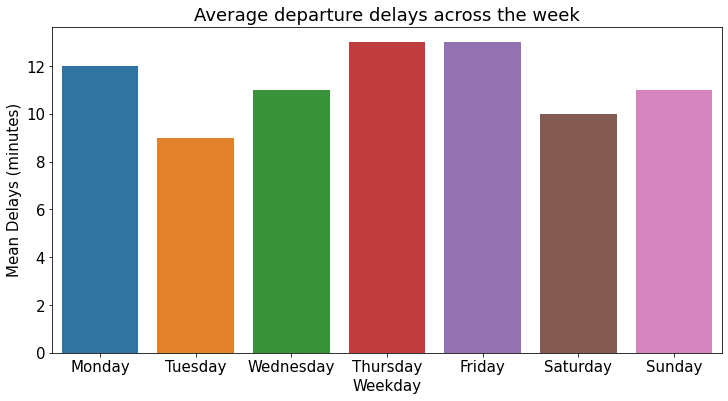

In [37]:
# Create barchart to portray the average departure delays per weekday
plt.figure(figsize=(12,6))
sns.barplot(x=day_week.index, y=mean_day_week)
plt.title('Average departure delays across the week', fontsize=18)
plt.xlabel('Weekday', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Mean Delays (minutes)', fontsize=15)
plt.yticks(fontsize=15)

plt.show()

The best weekday to minimise departure delays is to fly on Tuesdays with the lowest average departure delay of 9 minutes. Saturdays are possible as well as the results showed the average departure delay is 9.5 minutes. However, there may be more air traffic on weekends as compared to weekdays.

### Best time of the year to fly to minimise delays

In [38]:
# Calculate the mean and average number of departure delays by month
month = flights.groupby('Month')['DepDelay'].apply(get_stats).unstack()
month

,mean,count
Month,,
January,11.263294,1175647.0
February,10.368575,1076123.0
March,11.309956,1222311.0
April,8.769499,1179523.0
May,9.079839,1217490.0
June,13.461032,1206995.0
July,14.974244,1248503.0
August,11.888859,1258937.0
September,9.152732,1158967.0


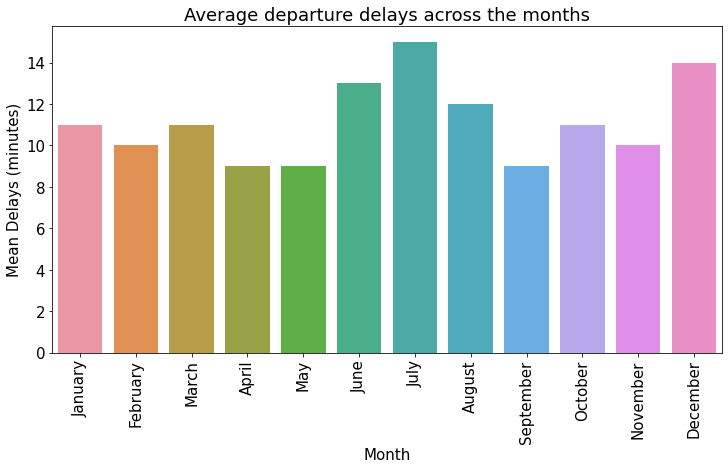

In [39]:
# Create data frame for mean values based on month
mean_month = month['mean'].values
mean_month = np.round(mean_month,0)

# Plot barchart based on the average flight delay by month
plt.figure(figsize=(12,6))
sns.barplot(x=month.index, y=mean_month)
plt.title('Average departure delays across the months', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('Mean Delays (minutes)', fontsize=15)
plt.yticks(fontsize=15)

plt.show()

The best months to minimise departure delays is to fly in April, May and September with the lowest average departure delay of 9 minutes.

### Q2: Do older planes suffer more delays?

As the variables presented do not specify a plane's age to differentiate the older planes, we calculate the age of a plane from the manufacturing years of the plane found in the plane-data CSV file subtracted by the main dataset's years. This is done through an inner join of both sets of data.

### Preparing planes data

In [40]:
# Load planes CSV file to data frame
planes = pd.read_csv('plane-data.csv')

# Prepare planes data by treating blanks as NA and removing missing values
nan_value = float("NaN")
planes.replace("", nan_value, inplace=True)
planes = planes.fillna(0)
planes.dropna(inplace=True)

# Inner join flights with planes where TailNum and tailnum are the keys
flights_merged = flights.merge(planes[['tailnum','year']], left_on='TailNum', right_on='tailnum')

# Coerce 'year' column in flights_merged from str to int
flights_merged['year'] = pd.to_numeric(flights_merged['year'], errors='coerce')

# Calculate the age of plane
flights_merged['planesAge'] = (flights_merged['Year'] - flights_merged['year'])

# On average, planes retire at 25 years old
# Hence only keep rows with age equals or less than 25 and not less than 0
planes_age_delayed = flights_merged.loc[(flights_merged['planesAge'] <= 25) & (flights_merged['planesAge'] > 0)]

# Create data frame to display the mean values of flight arrival delays based on plane age
avg_age_delay = planes_age_delayed.groupby('planesAge')['ArrDelay'].apply(get_stats).unstack()
avg_age_delay

,mean,count
planesAge,,
1.0,15.271666,547386.0
2.0,14.830513,699168.0
3.0,15.442951,827500.0
4.0,14.850390,950324.0
5.0,14.720508,920039.0
6.0,15.015924,763327.0
7.0,15.049152,723435.0
8.0,15.107736,489029.0
9.0,15.092864,354938.0


### Finding out if there is any relationship between a plane's age and the number of arrival delays

In [41]:
# Create data frame for mean values of flight delays based on plane age
mean_avg_age_delay = avg_age_delay['mean'].values
mean_avg_age_delay = np.round(mean_avg_age_delay,0)

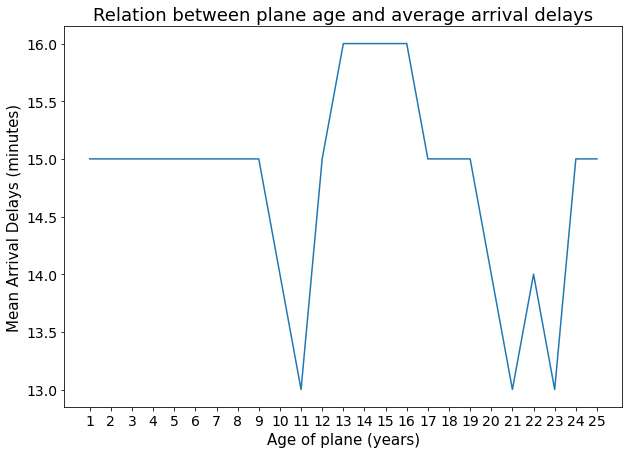

In [42]:
# Create a lineplot to show the relation between the two variables
plt.figure(figsize=(10,7))
sns.lineplot(x=avg_age_delay.index, y=mean_avg_age_delay, sort=False)
plt.title('Relation between plane age and average arrival delays', fontsize=18)
plt.xlabel('Age of plane (years)', fontsize=15)
plt.xticks(avg_age_delay.index, fontsize=14)
plt.ylabel('Mean Arrival Delays (minutes)', fontsize=15)
plt.yticks(fontsize=14)

plt.show()

There is no clear relationship between a plane's age and the average delays as there is no constant straight line sloping upwards. There are many fluctuations in the average delays as a plane ages over time. It is noted that at 11 years, the average delay is at a minimum of 13 minutes before increasing in delays. There are other factors that must be considered such as an aircraft's manufacturer type and engine type referred from the variables of the plane data CSV file that are attributable to the delays caused by the plane.

### Q3: How does the number of people flying between different locations change over time?

### Using flights arrivals as a proxy for the number of people

In [43]:
# Return arrivals at top 10 destinations in two years
destinations = flights['Dest'].value_counts().sort_values(ascending=False).head(10)
destinations

ATL    834233
ORD    711498
DFW    609077
LAX    464862
IAH    436073
DEN    415274
PHX    389545
LAS    352262
CVG    335127
EWR    313804
Name: Dest, dtype: int64

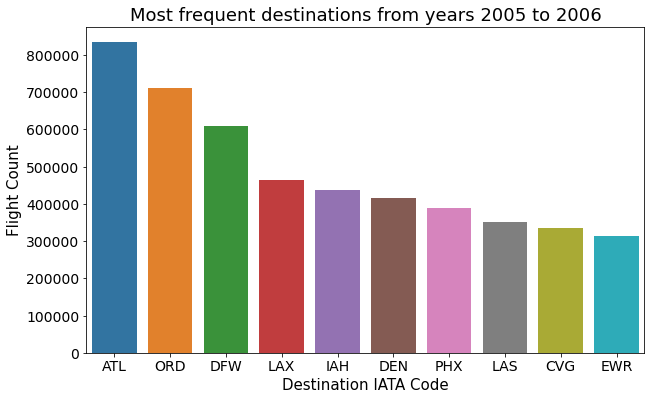

In [44]:
# Create a countplot to show the number of arrivals by destination
plt.figure(figsize=(10,6))
sns.countplot(x='Dest', data=flights, order=flights['Dest'].value_counts().sort_values(ascending=False).head(10).index)
plt.xlabel('Destination IATA Code', fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Flight Count', fontsize=15)
plt.yticks(fontsize=14)
plt.title('Most frequent destinations from years 2005 to 2006', fontsize=18)

plt.show()

### 5.7 Display the trend in the number of flights flying between different locations changing over time

In [45]:
# Tabulate the number of flights flying from ATL to LAX in two years
ATL_LAX = flights[(flights.Origin == 'ATL') & (flights.Dest == 'LAX')]['Month'].value_counts().sort_index(ascending=True).rename_axis('Month').reset_index(name='Count')
ATL_LAX

,Month,Count
0,January,752
1,February,670
2,March,767
3,April,744
4,May,837
5,June,852
6,July,886
7,August,896
8,September,814
9,October,858


In [46]:
# Tabulate the number of flights flying from ORD to IAH in two years
ORD_IAH = flights[(flights.Origin == 'ORD') & (flights.Dest == 'IAH')]['Month'].value_counts().sort_index(ascending=True).rename_axis('Month').reset_index(name='Count')
ORD_IAH

,Month,Count
0,January,983
1,February,847
2,March,982
3,April,948
4,May,977
5,June,1002
6,July,1027
7,August,1037
8,September,950
9,October,964


In [47]:
# Tabulate the number of flights flying from DFW to DEN in two years
DFW_DEN = flights[(flights.Origin == 'DFW') & (flights.Dest == 'DEN')]['Month'].value_counts().sort_index(ascending=True).rename_axis('Month').reset_index(name='Count')
DFW_DEN

,Month,Count
0,January,1294
1,February,1091
2,March,1200
3,April,1166
4,May,1400
5,June,1400
6,July,1460
7,August,1487
8,September,1395
9,October,1437


In [48]:
# Tabulate the number of flights flying from PHX to LAS in two years
PHX_LAS = flights[((flights.Origin == 'PHX') & (flights.Dest == 'LAS'))]['Month'].value_counts().sort_index(ascending=True).rename_axis('Month').reset_index(name='Count')
PHX_LAS

,Month,Count
0,January,1897
1,February,1711
2,March,1902
3,April,1816
4,May,1872
5,June,1878
6,July,1923
7,August,1954
8,September,1841
9,October,1906


In [49]:
# Tabulate the number of flights flying from CVG to EWR in two years
CVG_EWR = flights[((flights.Origin == 'CVG') & (flights.Dest == 'EWR'))]['Month'].value_counts().sort_index(ascending=True).rename_axis('Month').reset_index(name='Count')
CVG_EWR

,Month,Count
0,January,510
1,February,454
2,March,553
3,April,522
4,May,548
5,June,535
6,July,524
7,August,553
8,September,569
9,October,598


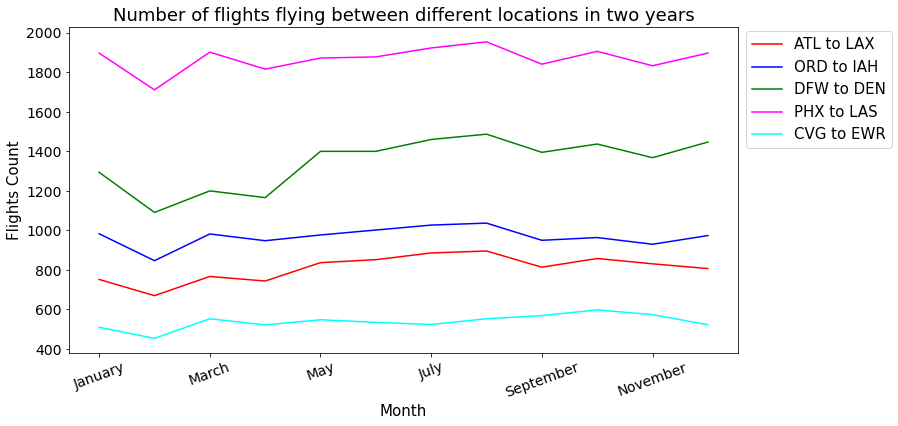

In [50]:
# Create lineplots on the number of flights flying between different locations in two years
plt.figure(figsize=(12,6))
ax = plt.gca()

ATL_LAX.plot(kind='line', x='Month', y='Count', color='red', label='ATL to LAX', ax=ax)
ORD_IAH.plot(kind='line', x='Month', y='Count', color='blue', label='ORD to IAH', ax=ax)
DFW_DEN.plot(kind='line', x='Month', y='Count', color='green', label='DFW to DEN', ax=ax)
PHX_LAS.plot(kind='line', x='Month', y='Count', color='magenta', label='PHX to LAS', ax=ax)
CVG_EWR.plot(kind='line', x='Month', y='Count', color='cyan', label='CVG to EWR', ax=ax)
ax.set_title('Number of flights flying between different locations in two years', fontsize=18)
plt.legend(loc='upper right', bbox_to_anchor=(1.24, 1.01), prop={'size': 15})
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=20, fontsize=14)
ax.set_ylabel('Flights Count', fontsize=15)
plt.yticks(fontsize=14)

plt.show()

Assuming all flights carry the same number of passengers and 500 seats for each plane, taking the maximum and minimum of the flights count axis, it totals a 1,000,000 passengers at maximum and 200,000 at minimum flying at one time across different locations.

### Q4: Can you detect cascading failures as delays in one airport create delays in others?

Cascading failures could refer to the reasons for flight delays that lead to delay propagation from an airport to another. With the available variables, we narrow down to flights that depart late, arrive late and the reasons for flight delays.

### Computing the average departure delays in origin airports

Departure delay is the difference between the departure time and scheduled departure time. This impacts the late aircraft delay as well as the arrival and scheduled arrival timings.

In [51]:
# Average departure delays by origin airports
origin_delays = flights.groupby('Origin')['DepDelay'].apply(get_stats).unstack()
origin_delays = origin_delays.sort_values('count', ascending=False)

# Subset 10 origin airports with the highest average delays
origin_delays = origin_delays.iloc[:10]
origin_delays

,mean,count
Origin,,
ATL,14.452778,838626.0
ORD,16.695118,711271.0
DFW,11.567794,608782.0
LAX,9.222588,464567.0
IAH,10.135663,436060.0
DEN,11.175223,415270.0
PHX,10.246644,389525.0
LAS,12.355789,352192.0
CVG,7.558156,334944.0


In [52]:
# Create data frame for mean delay values by origin airports
mean_origin_delays = origin_delays['mean'].values
mean_origin_delays = np.round(mean_origin_delays,0)

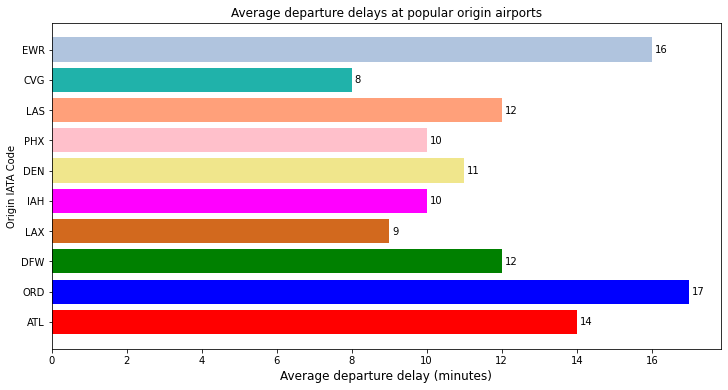

In [53]:
# Define color palette
colors = ['red', 'blue', 'green', 'chocolate', 'magenta', 'khaki', 'pink', 'lightsalmon', 'lightseagreen', 'lightsteelblue']

# Create horizontal barchart to show the average departure delays at popular origin airports
plt.figure(figsize=(12,6))
hbar = plt.barh(origin_delays.index, mean_origin_delays, color=colors)
plt.title('Average departure delays at popular origin airports')
plt.xlabel('Average departure delay (minutes)', fontsize=12)
plt.ylabel('Origin IATA Code')
plt.bar_label(hbar, padding=3)

plt.show()

### Computing the average arrival delays in destination airports

Arrival delay is the difference between the arrival time and scheduled arrival time. Flights departing late, weather and aircraft conditions are some reasons that flights arrive late at their destinations.

In [54]:
# Average arrival delays by destination airports
destination_delays = flights.groupby('Dest')['ArrDelay'].apply(get_stats).unstack()
destination_delays = destination_delays.sort_values('count', ascending=False)

# Subset 10 destination airports with the highest average delays
destination_delays = destination_delays.iloc[:10]
destination_delays

,mean,count
Dest,,
ATL,21.142511,834233.0
ORD,24.834803,711498.0
DFW,14.868205,609077.0
LAX,14.405301,464862.0
IAH,15.268565,436073.0
DEN,14.600808,415274.0
PHX,12.659901,389545.0
LAS,13.493289,352262.0
CVG,13.782324,335127.0


In [55]:
# Create data frame for mean delay values by destination airports
mean_destination_delays = destination_delays['mean'].values
mean_destination_delays = np.round(mean_destination_delays,0)

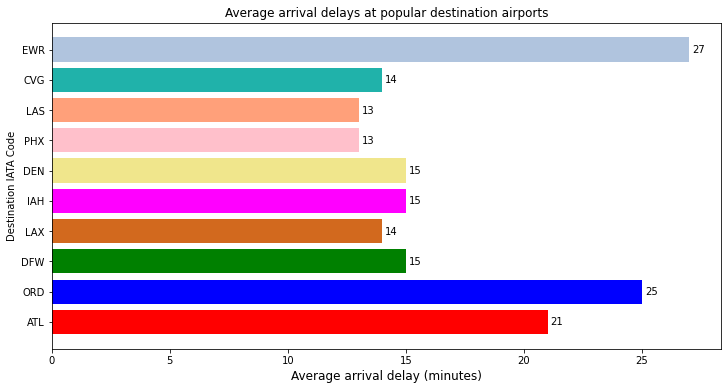

In [56]:
# Create horizontal barchart to show the average arrival delays at popular destination airports
plt.figure(figsize=(12,6))
hbar1 = plt.barh(destination_delays.index, mean_destination_delays, color=colors)
plt.title('Average arrival delays at popular destination airports')
plt.xlabel('Average arrival delay (minutes)', fontsize=12)
plt.ylabel('Destination IATA Code')
plt.bar_label(hbar1, padding=3)

plt.show()

In [57]:
# Subset top 10 origin airports with highest departure delays
filter_list = ['ATL','ORD','DFW','LAX','IAH','DEN','PHX','LAS','CVG','EWR']
airports_delayed = flights[flights['Origin'].isin(filter_list) & flights['Dest'].isin(filter_list)]

# Subset flights with delays of 15 minutes or more
airports_delayed = airports_delayed.loc[(airports_delayed['DepDelay'] >= 15) & (airports_delayed['ArrDelay'] >= 15)]
airports_delayed

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,...,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepStatus,ArrStatus
518,2005,January,6,Thursday,10.0,10.0,13.0,13.0,UA,N912UA,...,ORD,IAH,925,38,0,5,0,0,Delayed,Delayed
524,2005,January,12,Wednesday,11.0,10.0,14.0,13.0,UA,N902UA,...,ORD,IAH,925,30,0,0,0,31,Delayed,Delayed
533,2005,January,21,Friday,11.0,10.0,14.0,13.0,UA,N928UA,...,ORD,IAH,925,62,0,0,0,0,Delayed,Delayed
686,2005,January,1,Saturday,18.0,17.0,21.0,21.0,UA,N932UA,...,ORD,ATL,606,15,0,0,0,15,Delayed,Delayed
689,2005,January,4,Tuesday,18.0,17.0,21.0,21.0,UA,N936UA,...,ORD,ATL,606,22,0,0,0,0,Delayed,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14282284,2006,December,29,Friday,23.0,19.0,2.0,22.0,DL,N949DL,...,DFW,ATL,732,0,0,0,0,240,Delayed,Delayed
14282291,2006,December,29,Friday,21.0,20.0,23.0,22.0,DL,N385DN,...,ATL,DFW,732,36,0,25,0,0,Delayed,Delayed
14282385,2006,December,29,Friday,12.0,12.0,16.0,15.0,DL,N943DL,...,DFW,ATL,732,0,0,6,0,19,Delayed,Delayed
14282404,2006,December,29,Friday,20.0,17.0,22.0,20.0,DL,N3761R,...,EWR,ATL,745,174,0,0,0,0,Delayed,Delayed


In [58]:
# Create data frames for summing causes of delays
carrier_delay = airports_delayed['CarrierDelay'].sum()
weather_delay = airports_delayed['WeatherDelay'].sum()
NAS_delay = airports_delayed['NASDelay'].sum()
security_delay = airports_delayed['SecurityDelay'].sum()
lateaircraft_delay = airports_delayed['LateAircraftDelay'].sum()

# Create a data frame from dictionary to hold data frames
delay_causes_sum = {'CarrierDelay': carrier_delay, 'WeatherDelay': weather_delay, 'NASDelay': NAS_delay, 'SecurityDelay': security_delay, 'LateAircraftDelay': lateaircraft_delay}

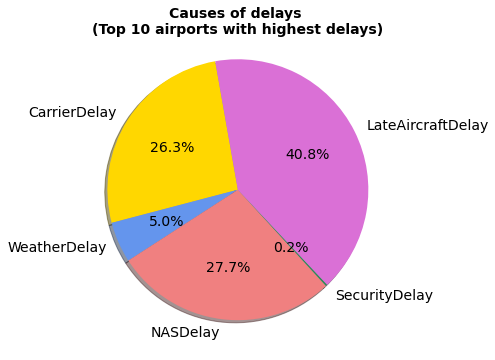

In [59]:
# Create piechart showing the percentage of each cause of delays by top 10 airports with highest delays
plt.figure(figsize=(12,6))
plt.pie(delay_causes_sum.values(), labels=delay_causes_sum.keys(), colors=['gold','cornflowerblue', 'lightcoral', 'seagreen', 'orchid'], textprops={'fontsize': 14}, shadow=True, startangle=100, autopct='%1.1f%%')
plt.title('Causes of delays \n(Top 10 airports with highest delays)', fontsize=14, fontweight='bold', y=0.96)

plt.show()

From the piechart, we can confirm that the delays were mainly caused by late arriving aircrafts at 40.8%.

### Plot network graph for delayed flight routes to show impact of delays

In [60]:
# Extract top 10 airports with the highest delays to new data frame
airports_delayed_sub = airports_delayed[['Origin','Dest']].reset_index(drop=True)
airports_delayed_sub

,Origin,Dest
0,ORD,IAH
1,ORD,IAH
2,ORD,IAH
3,ORD,ATL
4,ORD,ATL
...,...,...
172306,DFW,ATL
172307,ATL,DFW
172308,DFW,ATL
172309,EWR,ATL


In [61]:
# Store frequency of delayed routes between airports (100 most popular delayed routes) for building network
nodes_freq = airports_delayed_sub.groupby(['Origin', 'Dest']).size().reset_index(name='Frequency').sort_values('Frequency', ascending=False)
nodes_freq[:100]

# Show top 10 most popular delayed routes
nodes = nodes_freq.head(10).reset_index(drop=True)
nodes

,Origin,Dest,Frequency
0,ORD,EWR,4760
1,ATL,EWR,4568
2,LAX,LAS,4417
3,LAS,LAX,4339
4,ATL,DFW,4013
5,EWR,ATL,3981
6,LAS,PHX,3870
7,PHX,LAS,3759
8,ORD,DFW,3648
9,DFW,ATL,3574


In [62]:
# Store airports and flight delay routes between airports into a single data frame for building network
origin_node = nodes['Origin']
dest_node = nodes['Dest']
frequency = nodes['Frequency']

delayed_network = pd.DataFrame({'Origin': origin_node, 'Dest': dest_node, 'Frequency': frequency})
print(delayed_network)

  Origin Dest  Frequency
0    ORD  EWR       4760
1    ATL  EWR       4568
2    LAX  LAS       4417
3    LAS  LAX       4339
4    ATL  DFW       4013
5    EWR  ATL       3981
6    LAS  PHX       3870
7    PHX  LAS       3759
8    ORD  DFW       3648
9    DFW  ATL       3574


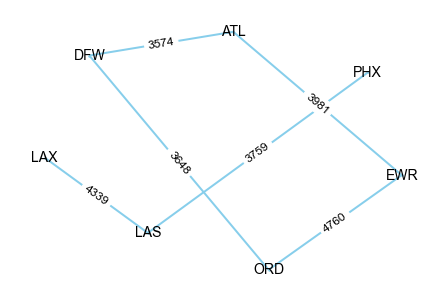

In [122]:
# Set colours and sizes
options = {'node_color': 'skyblue', 'edge_color': 'skyblue', 'node_size': 2, 'width': 2, 'alpha': 1.0}

# Build networkx graph
# spring_layout positions nodes using Fruchterman-Reingold force-directed algorithm
# The value in k specifies the optimal distance between nodes
G = nx.from_pandas_edgelist(df=delayed_network, source='Origin', target='Dest', edge_attr='Frequency')
pos = nx.spring_layout(G, k=10)
nx.draw(G, pos, with_labels=True, font_size=14, **options)
labels = {e: G.edges[e]['Frequency'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

plt.show()

From the network graph drawn, there are 7 airports (EWR, PHX, LAS, ATL, DFW, ORD, LAX) and 6 flight routes. The graph is interpreted from a source node moving downwards to the next node, hence the numbers displayed to show the weight of the edges. These numbers show the flights flying from the origin to destinated airports and impact of delays cascading from each location.

A total of 23,871 flights within two years arrived at these airports were affected by cascading delays between locations, with the most flights originating from Chicago O'Hare International (ORD) and arriving in Newark Liberty International Airport (EWR) at 4,758 flights.

### Q5: Use the available variables to construct a model that predicts delays

### 6 Constructing a flight delay prediction model

### 6.1 Data Preparation

The dataset comprises of multiple numerical and categorical variables as displayed in the data frame below.

In [64]:
# Preview original dataset
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,...,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepStatus,ArrStatus
0,2005,January,28,Friday,16.0,16.0,17.0,18.0,UA,N935UA,...,BOS,ORD,867,0,0,0,0,0,On-Time,On-Time
1,2005,January,29,Saturday,16.0,16.0,17.0,18.0,UA,N941UA,...,BOS,ORD,867,0,0,0,0,0,On-Time,On-Time
2,2005,January,30,Sunday,16.0,16.0,17.0,18.0,UA,N342UA,...,BOS,ORD,867,0,0,0,0,0,On-Time,On-Time
3,2005,January,31,Monday,16.0,16.0,17.0,18.0,UA,N326UA,...,BOS,ORD,867,0,0,0,0,0,On-Time,On-Time
4,2005,January,2,Sunday,19.0,19.0,22.0,22.0,UA,N902UA,...,ORD,BOS,867,0,0,0,0,0,Delayed,On-Time


In [65]:
flights.shape

(14277719, 25)

The focus is to build a flight delay prediction model where the model will predict if a flight is delayed or not delayed. To restate, a flight is on-time only when the departure delay is less than 15 minutes of the scheduled departure time. On the other hand, a flight is delayed if the departure delay is 15 minutes or more of the scheduled departure time. Hence, the threshold for a delayed flight will be 15 minutes.

With this in mind, future flight delay predictions are made for flights arriving to airports only. To reduce the computational time required, a sample size of 100,000 will be used and split into 80% for training and 20% testing.

In [66]:
# Preserve original dataset by creating new data frame
flights_samples_cols = flights

In [67]:
# Subset flight data by dropping irrelevant columns
'''
The variables associated with historical dates and timings, flight numbers, tail numbers, airtime, departures and delays
are not included as the focus is fixed on future flights and whether the flight will be delayed with 100,000 samples.
'''
flights_samples_cols = flights_samples_cols.drop(['Year','Month','DayofMonth','DayOfWeek','DepTime','ArrTime','TailNum','ActualElapsedTime','AirTime','DepDelay','ArrDelay','Origin','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','DepStatus'], axis=1)

In [68]:
# ArrStatus column to serve as a response variable for flight delay status (DepStatus is not included as it consists of departure delays)
# Binary data type where 1 = Delayed, 0 = On-Time
flights_samples_cols['ArrStatus'] = flights_samples_cols['ArrStatus'].map({'On-Time': 0, 'Delayed': 1})

# Rename 'ArrStatus' column to 'Delayed'
flights_samples_cols = flights_samples_cols.rename(columns={'ArrStatus': 'Delayed'})

In [69]:
# Inspect dataset
flights_samples_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14277719 entries, 0 to 14282517
Data columns (total 7 columns):
 #   Column          Dtype   
---  ------          -----   
 0   CRSDepTime      float64 
 1   CRSArrTime      float64 
 2   UniqueCarrier   category
 3   CRSElapsedTime  int16   
 4   Dest            category
 5   Distance        int16   
 6   Delayed         category
dtypes: category(3), float64(2), int16(2)
memory usage: 435.7 MB


In [70]:
# Subset flight data to contain only ORD destination airport
flights_samples_ORD = flights_samples_cols[(flights_samples_cols['Dest'] == 'ORD')]

# Split flight data into 50,000 from 2005 and 50,000 from 2006
flights_samples_2005 = flights_samples_ORD.iloc[:50000]
flights_samples_2006 = flights_samples_ORD.iloc[:11894591].tail(50000)

# Combine subsets of flight data to contain only 100,000 samples from ORD destination airport from 2005 & 2006
flights_samples = pd.concat([flights_samples_2005, flights_samples_2006], ignore_index=True, sort=False)
flights_samples

,CRSDepTime,CRSArrTime,UniqueCarrier,CRSElapsedTime,Dest,Distance,Delayed
0,16.0,18.0,UA,174,ORD,867,0
1,16.0,18.0,UA,174,ORD,867,0
2,16.0,18.0,UA,175,ORD,867,0
3,16.0,18.0,UA,174,ORD,867,0
4,17.0,19.0,UA,180,ORD,867,0
...,...,...,...,...,...,...,...
99995,17.0,21.0,DL,189,ORD,1249,0
99996,10.0,14.0,DL,188,ORD,1249,0
99997,8.0,12.0,DL,184,ORD,1249,0
99998,9.0,11.0,DL,136,ORD,606,0


In [71]:
# Overview of data frame
# No missing values found due to pre-processing of data beforehand
flights_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   CRSDepTime      100000 non-null  float64 
 1   CRSArrTime      100000 non-null  float64 
 2   UniqueCarrier   100000 non-null  category
 3   CRSElapsedTime  100000 non-null  int16   
 4   Dest            100000 non-null  category
 5   Distance        100000 non-null  int16   
 6   Delayed         100000 non-null  category
dtypes: category(3), float64(2), int16(2)
memory usage: 2.3 MB


### 6.11 Multivariate Analysis and Visualisation

### Univariate Analysis

In [72]:
# Summarised statistics of variables
flights_samples.describe()

,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,12.355580,13.81152,133.578700,727.219700
std,4.488446,4.61760,60.245823,538.258372
min,5.000000,0.00000,26.000000,67.000000
25%,8.000000,10.00000,85.000000,316.000000
50%,12.000000,14.00000,130.000000,607.000000
75%,16.000000,18.00000,162.000000,888.000000
max,24.000000,24.00000,493.000000,4243.000000


In [73]:
flights_samples['Delayed'].value_counts()

0    67158
1    32842
Name: Delayed, dtype: int64

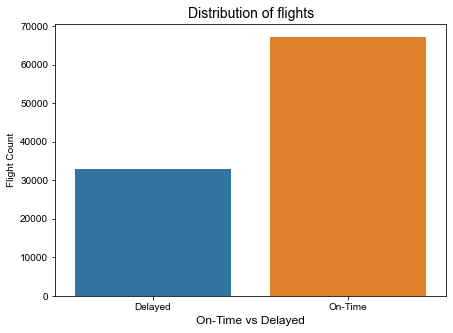

In [74]:
# Create a countplot on 'Delayed' variable
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Delayed', data=flights_samples)
sns.set_style('darkgrid')
ax.set_title('Distribution of flights', fontsize=14)
ax.set_xlabel('On-Time vs Delayed', fontsize=12)
ax.set_xticklabels(['Delayed','On-Time'])
ax.set_ylabel('Flight Count')

plt.show()

The number of delayed flights (1) is significantly lower by around 40k compared to on-time flights (0) due to the sampling size as well as uneven  data slicing (First 50k samples from 2005 and last 50k samples from 2006). Hence, this must be balanced out for the model so the results will not be biased.

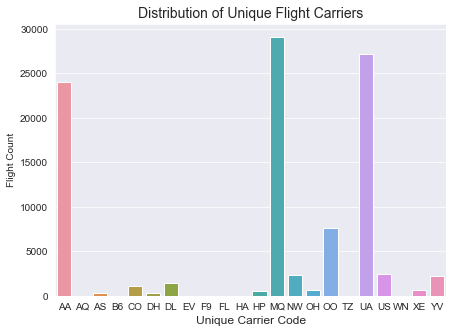

In [75]:
# Create a countplot on 'UniqueCarrier' variable
plt.figure(figsize=(7,5))
ax = sns.countplot(x='UniqueCarrier', data=flights_samples)
sns.set_style('darkgrid')
ax.set_title('Distribution of Unique Flight Carriers', fontsize=14)
ax.set_xlabel('Unique Carrier Code', fontsize=12)
ax.set_ylabel('Flight Count')

plt.show()

There are 22 types of airlines with United Air Lines Inc. (UA) producing the highest number of flights arriving at ORD airport. This categorical variable must be encoded to ensure only the three airlines (UA,MQ,AA) with the most number of flights are kept and equally distributed.

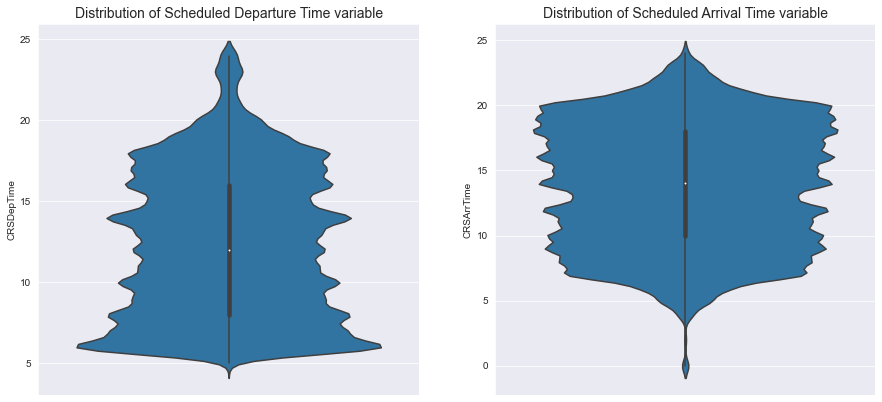

In [76]:
# Create violinplots to portray the distributions for 'CRSDepTime' and 'CRSArrTime' variable
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
ax = sns.violinplot(y='CRSDepTime',data=flights_samples, ax=ax)
ax.set_title('Distribution of Scheduled Departure Time variable', fontsize=14)

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.violinplot(y='CRSArrTime',data=flights_samples, ax=ax2)
ax2.set_title('Distribution of Scheduled Arrival Time variable', fontsize=14)

plt.show()

The distributions of the scheduled departure and arrival timings are fairly distributed, with the scheduled arrival timing violin plot having a short tail from scheduled early arrivals at 1am. The scheduled departure time is right skewed whereas the scheduled arrival time is left skewed. There are multiple peak periods for both scheduled timings with the highest peak for schedule departure at around 6am.

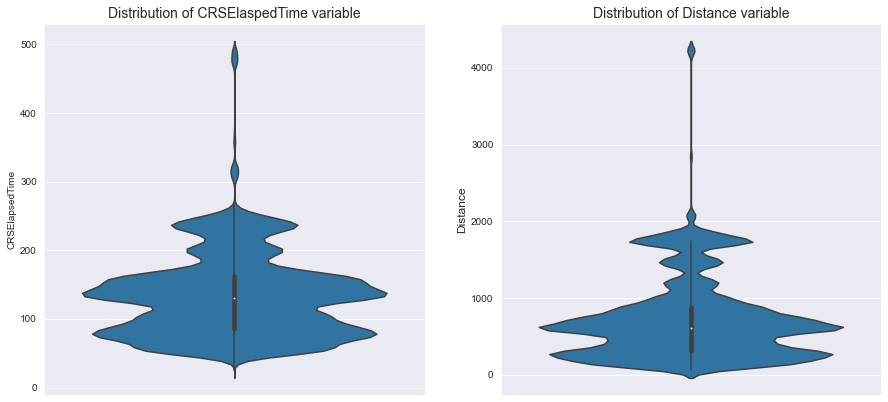

In [77]:
# Create violinplots to portray the distribution for 'CRSElapsedTime' and 'Distance' variables
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
ax = sns.violinplot(y='CRSElapsedTime',data=flights_samples, ax=ax)
ax.set_title('Distribution of CRSElaspedTime variable', fontsize=14)

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.violinplot(y='Distance',data=flights_samples, ax=ax2)
ax2.set_title('Distribution of Distance variable', fontsize=14)
ax2.set_ylabel('Distance', fontsize=12)

plt.show()

The scheduled elapsed timings are distributed near the median at around 120 minutes. Both the scheduled elapsed time and distance variables are right skewed with long tails from the presence of outliers. The distance variable has a high peak point due to frequent flights from a common origin airport and arriving at ORD airport. Both violin plots look similar due to their strong correlations.

### Bivariate Analysis

<Figure size 720x720 with 0 Axes>

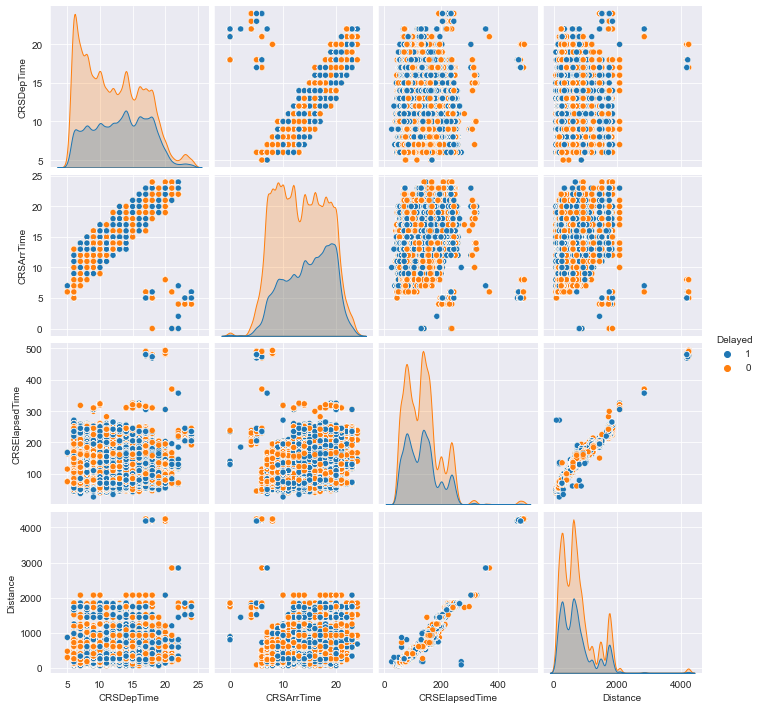

In [78]:
# Create a pairplot matrix to show relationships between input variables
# Kernel density plots are shown instead of histograms here to display the distribution of input variables
plt.figure(figsize=(10,10))
sns.pairplot(flights_samples[['Delayed','CRSDepTime','CRSArrTime','CRSElapsedTime','Distance']], hue='Delayed', diag_kind='kde')

plt.show()

The pairplot aims to compare on-time and delayed flights depicted by the orange and blue colors respectively.

There is a strong positive linear relationship between the Scheduled Elapsed Time and Distance. Longer flight distances takes up more time for the flight to cover. The correlation between these variables also showed a 0.99 score from an earlier heatmap. 

The distributions for the Scheduled Arrival Timings are left skewed with many peaks whereas for the Scheduled Departure, Elapsed Timings and Distance, they are right skewed. These same distributions are reflected in the violin plots before. This means that the mean is greater than the median of the dataset as shown below in the boxplots.

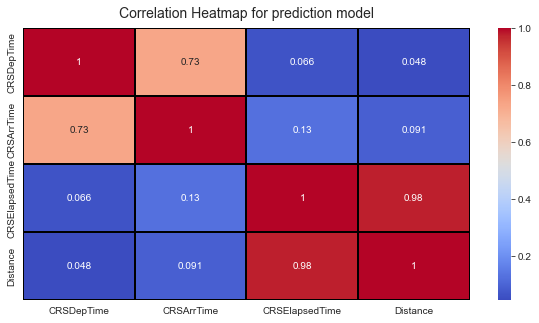

In [79]:
# Create heatmap to display the correlations between variables
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(flights_samples.corr(), cmap="coolwarm", linewidths=0.1, linecolor='black', annot=True)
heatmap.set_title('Correlation Heatmap for prediction model', fontdict={'fontsize':14}, pad=10)

plt.show()

The heatmap suggests a strong correlation of 0.98 identified before between Scheduled Elapsed Time and Distance. Other strong correlations between variables are Scheduled Departure and Scheduled Arrival Timings, where there is a linear straight line shown in the pairplot graph. The Scheduled Departure Time is at a correlation of 0.73 with the Scheduled Arrival Time (positive strong correlation). All the other variables have almost no correlation with each other. Therefore, it is difficult to decipher if a flight will be delayed without machine learning to detect patterns and make predictions.

Since the threshold is set at 0.5, all variables above 0.5 will be kept for building the model.

### 6.12 Balancing distribution of Delayed variable through random oversampling

In [80]:
# Class count for 'Delayed' variable
count_class_0, count_class_1 = flights_samples.Delayed.value_counts()

# Divide by class
flights_samples_class_0 = flights_samples[flights_samples['Delayed'] == 0]
flights_samples_class_1 = flights_samples[flights_samples['Delayed'] == 1]

Random oversampling:
1    67158
0    67158
Name: Delayed, dtype: int64


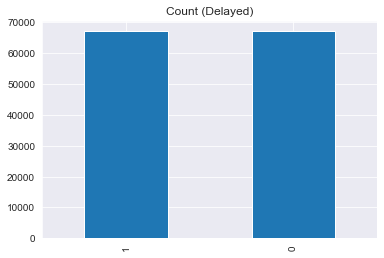

In [81]:
# Balance distribution of 'Delayed' variable
flights_samples_class_1_over = flights_samples_class_1.sample(count_class_0, replace=True)
flights_samples_test_over = pd.concat([flights_samples_class_0, flights_samples_class_1_over], axis=0)

print('Random oversampling:')
print(flights_samples_test_over.Delayed.value_counts())

# Plot barchart to show the balanced distribution of 'Delayed' variable
flights_samples_test_over.Delayed.value_counts().plot(kind='bar', title='Count (Delayed)');

### 6.1 Building the pipeline

### Feature Selection

In [82]:
# Feature selection (Dest is not included as it only contains one fixed value ORD)
features = ['CRSDepTime','CRSArrTime','UniqueCarrier','CRSElapsedTime','Distance']

The above features are chosen as the prediction model must predict if a particular flight will be delayed or on-time based on the unknown variables such as date time of departure and arrival, and the known variables like scheduled timings and distance.

### Creating train test sets

In [83]:
# Define X dependent variables and y response variable
X = flights_samples[features].copy()
y = flights_samples['Delayed']

In [84]:
# Split into train test sets (train: 80%, test: 20%)
# random_state is used for initializing a random number generator which will decide the splitting of data into train and test indices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 5) (20000, 5) (80000,) (20000,)


### Creating the pipeline

Numerical features

In [85]:
# Containing all numerical features
numerical_features = ['CRSDepTime','CRSArrTime','CRSElapsedTime','Distance']

# Applying SimpleImputer and StandardScaler into a pipeline for normalization of numerical values
# SimpleImputer() imputs the mean/median of observations of each variable and scales with the function StandardScaler()
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

Categorical features

In [86]:
# Containing all selected categorical variables
categorical_features = ['UniqueCarrier']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
# OneHotEncoder() encodes categorical columns 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Merged pipeline

In [87]:
# Merge numerical and categorical features with function ColumnTransformer() into new pipeline data_transformer for machine learners
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)])

### 6.2 Supervised learning: Classification predictive modeling

The flight prediction model is to show whether a flight will be delayed with the response variable being binary and with labeled data. Therefore, classification predictive modeling is chosen over regression since the prediction is not about quantity. Another reason is the huge sample size in the millions.

### Train and test with different machine learning models

### 6.21 Logistic Regression Pipeline

Pipelines help assemble several steps that can be cross-validated together while setting different parameters. Hyperparameter tuning considers many different hyperparameter combinations and are tested to avoid overfitting the model through cross validation to yield the best score.

In [88]:
# Attach learner to data_transformer pipeline
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_lr', LogisticRegression(max_iter=10000, penalty='none'))]) # penalty=l2 is set as the default
# L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients. Ridge regression uses this method.

In [89]:
# Using GridSearchCV(), a cross validation method for pipelines to conduct hyperparameters tuning for higher accuracy in prediction model
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
# For numerical values, use imputation strategies by SimpleImputer (mean or median)
# For categorical values, use most frequent value of each variable or constant (filling missing value with 0)
# Important note: Parameters of pipelines are set using '__' separated parameter names

# Hyperparameter tuning for Logistic Regression
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CRSDepTime',
                                                                          'CRSArrTime',
                                                                          'CRSElapsedTime',
                                                                          'Distance']),
                                                                        ('cate

In [90]:
# Accuracy test score on Logistic Regression
y_pred_lr = grid_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80     13314
           1       0.35      0.01      0.01      6686

    accuracy                           0.66     20000
   macro avg       0.51      0.50      0.41     20000
weighted avg       0.56      0.66      0.54     20000



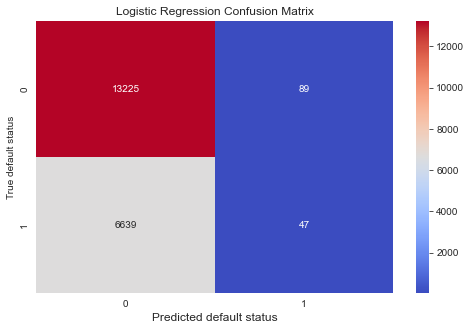

In [91]:
# Create confusion matrix on Logistic Regression
lr_cm = confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize=(8,5))
ax = sns.heatmap(lr_cm, annot=True, cmap='coolwarm', fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True default status')
ax.set_xlabel('Predicted default status', fontsize=12)

plt.show()

From the accuracy test score and confusion matrix for logistic regression, it confirms that 13,225 out of 13,314 flights (Sensitivity: 99.3%) are predicted to be on-time whereas 6,639 out of 6,686 flights (Specificity: 99.3%) are predicted to be delayed. The overall classification accuracy of the Logistic Regression model is 66%.

### 6.22 Gradient Boosting Classifier Pipeline

In [92]:
# Gradient Boosting is applied to boost the strength of learner
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer),
       ('pipe_gdb',GradientBoostingClassifier(random_state=42))])

grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_grid)
grid_gdb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CRSDepTime',
                                                                          'CRSArrTime',
                                                                          'CRSElapsedTime',
                                                                          'Distance']),
                                                                        ('cate

In [93]:
# Accuracy test score on Gradient Boosting Classifier
y_pred_gdb = grid_gdb.predict(X_test)
print(classification_report(y_test, y_pred_gdb))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80     13314
           1       0.54      0.00      0.00      6686

    accuracy                           0.67     20000
   macro avg       0.60      0.50      0.40     20000
weighted avg       0.62      0.67      0.53     20000



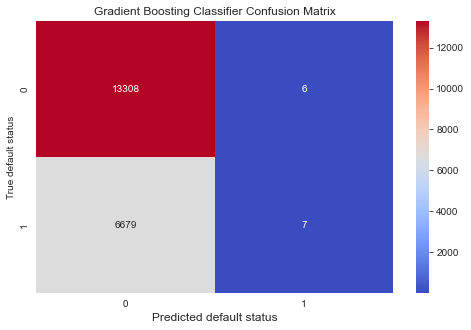

In [94]:
# Create confusion matrix on Gradient Boosting Classifier
gdb_cm = confusion_matrix(y_test,y_pred_gdb)

plt.figure(figsize=(8,5))
ax = sns.heatmap(gdb_cm, annot=True, cmap='coolwarm', fmt='.0f')
ax.set_title('Gradient Boosting Classifier Confusion Matrix')
ax.set_ylabel('True default status')
ax.set_xlabel('Predicted default status', fontsize=12)

plt.show()

From the accuracy test score and confusion matrix for gradient boosting classifier, it confirms that 13,308 out of 13,314 flights (Sensitivity: 99.9%) are predicted to be on-time whereas 6,679 out of 6,686 flights (Specificity: 99.9%) are predicted to be delayed. The overall classification accuracy of the Gradient Boosting Classifier model is 67%.

### 6.23 Random Forest Classifier Pipeline

In [95]:
# Random Forest Classifier fits a number of decision tree classifiers to improve the predictive accuracy and control over-fitting
pipe_rfc = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_rfc', RandomForestClassifier(random_state=1))])
grid_rfc = GridSearchCV(pipe_rfc, param_grid=param_grid)
grid_rfc.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CRSDepTime',
                                                                          'CRSArrTime',
                                                                          'CRSElapsedTime',
                                                                          'Distance']),
                                                                        ('cate

In [96]:
# Accuracy test score on Random Forest Classifier
y_pred_rfc = grid_rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.69      0.89      0.77     13314
           1       0.46      0.19      0.27      6686

    accuracy                           0.66     20000
   macro avg       0.57      0.54      0.52     20000
weighted avg       0.61      0.66      0.61     20000



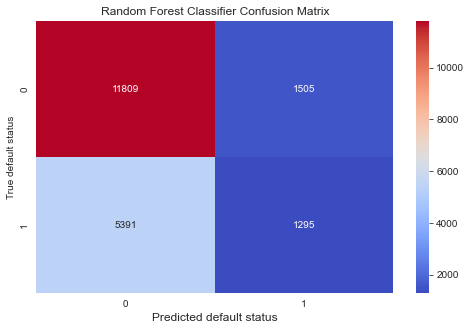

In [97]:
# Create confusion matrix on Random Forest Classifier
rfc_cm = confusion_matrix(y_test,y_pred_rfc)

plt.figure(figsize=(8,5))
ax = sns.heatmap(rfc_cm, annot=True, cmap='coolwarm', fmt='.0f')
ax.set_title('Random Forest Classifier Confusion Matrix')
ax.set_ylabel('True default status')
ax.set_xlabel('Predicted default status', fontsize=12)

plt.show()

From the accuracy test score and confusion matrix for random forest classifier, it confirms that 11,809 out of 13,314 flights (Sensitivity: 88.7%) are predicted to be on-time whereas 5,391 out of 6,686 flights (Specificity: 80.6%) are predicted to be delayed. The overall classification accuracy of the Random Forest Classifier model is 66%.

### 6.3 Evaluation of models

### Comparison of models through Receiver Operating Characteristic (ROC) Curve

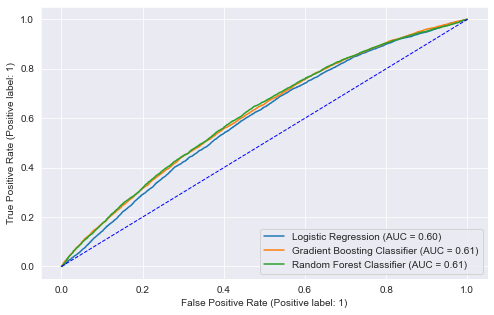

In [98]:
# Plot ROC curves to show accuracy of each learner for flight prediction model
ax, fig = plt.subplots(figsize=(8,5))
ax = plt.gca() # Get current Axes instance

plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Logistic Regression')
plot_roc_curve(grid_gdb, X_test, y_test, ax=ax, name='Gradient Boosting Classifier')
plot_roc_curve(grid_rfc, X_test, y_test, ax=ax, name='Random Forest Classifier')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.show()

Although all three models showed a similar score range, the Gradient Boosting Classifier and Random Forest Classifier models showed the best score at AUC = 0.61. Compared to a model with AUC score of 0.9 to 1.0, this means that the positives and negatives are almost the same and cannot be distinguished by the models. It may be due to several factors such as the samples used and narrowing to only ORD destination airports to create future predictions. Different airports may also vary in results.